<a href="https://colab.research.google.com/github/joannechoi/DC-Crime-Analysis/blob/add_eda_110221/602_EDA_110221.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('/content/MergedData_2019-2021.csv')
df.head()

,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,WARD,DISTRICT,LATITUDE,LONGITUDE,START_DATE,END_DATE
0,2019/11/07 16:41:36+00,DAY,OTHERS,THEFT/OTHER,1500 - 1599 BLOCK OF INDEPENDENCE AVENUE SE,401480.677087,135528.177723,6.0,1.0,38.887593,-76.982933,2019/11/07 15:36:52+00,2019/11/07 16:42:02+00
1,2019/01/21 07:19:30+00,MIDNIGHT,OTHERS,THEFT F/AUTO,1300 - 1399 BLOCK OF V STREET NW,397330.140000,138916.410000,1.0,3.0,38.918113,-77.030786,2019/01/21 00:00:55+00,2019/01/21 06:50:23+00
2,2019/01/21 08:19:17+00,MIDNIGHT,OTHERS,BURGLARY,2100 - 2199 BLOCK OF F STREET NW,395857.340000,136612.690000,2.0,2.0,38.897354,-77.047756,2019/01/21 06:00:51+00,2019/01/21 06:02:07+00
3,2019/01/21 08:23:53+00,MIDNIGHT,OTHERS,THEFT F/AUTO,1800 - 1899 BLOCK OF 12TH STREET NW,397564.730000,138552.270000,1.0,3.0,38.914833,-77.028080,2019/01/21 08:06:19+00,NaN
4,2019/01/21 09:12:09+00,MIDNIGHT,OTHERS,THEFT/OTHER,3800 - 3899 BLOCK OF GEORGIA AVENUE NW,397868.680000,141140.380000,4.0,4.0,38.938148,-77.024583,2019/01/21 08:09:28+00,2019/01/21 09:14:36+00


In [3]:
# view data types for each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84197 entries, 0 to 84196
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   REPORT_DAT  84197 non-null  object 
 1   SHIFT       84197 non-null  object 
 2   METHOD      84197 non-null  object 
 3   OFFENSE     84197 non-null  object 
 4   BLOCK       84197 non-null  object 
 5   XBLOCK      84197 non-null  float64
 6   YBLOCK      84197 non-null  float64
 7   WARD        82507 non-null  float64
 8   DISTRICT    84110 non-null  float64
 9   LATITUDE    84197 non-null  float64
 10  LONGITUDE   84197 non-null  float64
 11  START_DATE  84192 non-null  object 
 12  END_DATE    74075 non-null  object 
dtypes: float64(6), object(7)
memory usage: 8.4+ MB


In [4]:
# convert REPORT_DAT, STATE_DATE, and END_DATE to datetime type 
df[['REPORT_DAT', 'START_DATE', 'END_DATE']]= df[['REPORT_DAT', 'START_DATE', 'END_DATE']].astype('datetime64[ns]')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84197 entries, 0 to 84196
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   REPORT_DAT  84197 non-null  datetime64[ns]
 1   SHIFT       84197 non-null  object        
 2   METHOD      84197 non-null  object        
 3   OFFENSE     84197 non-null  object        
 4   BLOCK       84197 non-null  object        
 5   XBLOCK      84197 non-null  float64       
 6   YBLOCK      84197 non-null  float64       
 7   WARD        82507 non-null  float64       
 8   DISTRICT    84110 non-null  float64       
 9   LATITUDE    84197 non-null  float64       
 10  LONGITUDE   84197 non-null  float64       
 11  START_DATE  84192 non-null  datetime64[ns]
 12  END_DATE    74075 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(6), object(4)
memory usage: 8.4+ MB


In [5]:
#display number of null values
df.isna().sum()

REPORT_DAT        0
SHIFT             0
METHOD            0
OFFENSE           0
BLOCK             0
XBLOCK            0
YBLOCK            0
WARD           1690
DISTRICT         87
LATITUDE          0
LONGITUDE         0
START_DATE        5
END_DATE      10122
dtype: int64

In [6]:
# drop records with null values
crime = df.dropna()
crime.shape

(72492, 13)

In [7]:
# split the data into pre-covid (< 3/10/2020) and during covid (>= 3/11/2020)
split_date = pd.datetime(2020,3,10)
preCovid = crime.loc[crime['REPORT_DAT'] <= split_date]
Covid = crime.loc[crime['REPORT_DAT'] > split_date]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


Crime count by type before Covid-19
THEFT/OTHER                   15567
THEFT F/AUTO                  11068
MOTOR VEHICLE THEFT            2171
ROBBERY                        1879
ASSAULT W/DANGEROUS WEAPON     1278
BURGLARY                       1237
SEX ABUSE                       217
HOMICIDE                        145
ARSON                             9
Name: OFFENSE, dtype: int64
Crime count by type during Covid-19
THEFT/OTHER                   15024
THEFT F/AUTO                  12359
MOTOR VEHICLE THEFT            4838
ROBBERY                        2503
ASSAULT W/DANGEROUS WEAPON     1957
BURGLARY                       1730
SEX ABUSE                       258
HOMICIDE                        241
ARSON                            11
Name: OFFENSE, dtype: int64


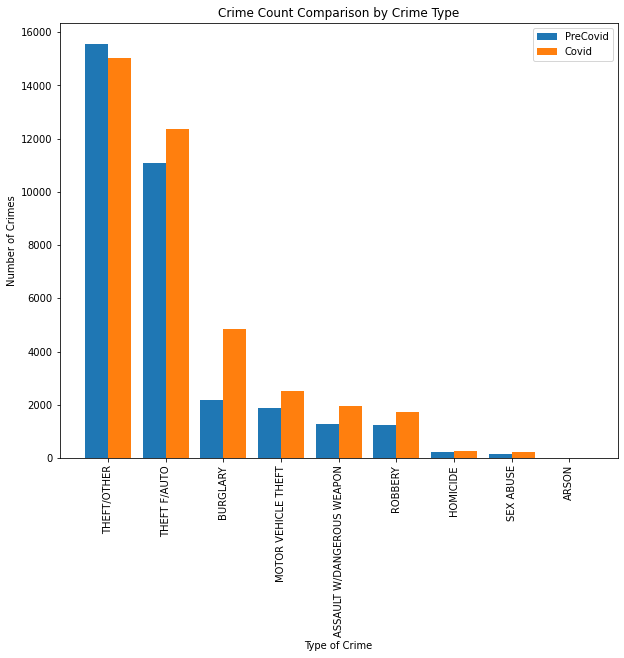

In [8]:
# view crime count by type before and during covid
crimeTypes = crime["OFFENSE"].unique()
pc_t = preCovid['OFFENSE'].value_counts()
c_t = Covid['OFFENSE'].value_counts()
print("Crime count by type before Covid-19",pc_t,"Crime count by type during Covid-19",c_t,sep='\n')

plt.figure(figsize=(10, 8))

x = np.arange(len(crimeTypes))
plt.bar(x - 0.2, pc_t, 0.4, label = 'PreCovid')
plt.bar(x + 0.2, c_t, 0.4, label = 'Covid')

plt.xticks(x, crimeTypes, rotation = 90)
plt.xlabel("Type of Crime")
plt.ylabel("Number of Crimes")
plt.title("Crime Count Comparison by Crime Type")
plt.legend()
plt.show()

Crime count by ward before Covid-19
1.0    4758
2.0    7088
3.0    2106
4.0    2983
5.0    5020
6.0    5532
7.0    3544
8.0    2540
Name: WARD, dtype: int64
Crime count by ward during Covid-19
1.0    5443
2.0    6325
3.0    2110
4.0    3724
5.0    6058
6.0    7111
7.0    4618
8.0    3532
Name: WARD, dtype: int64


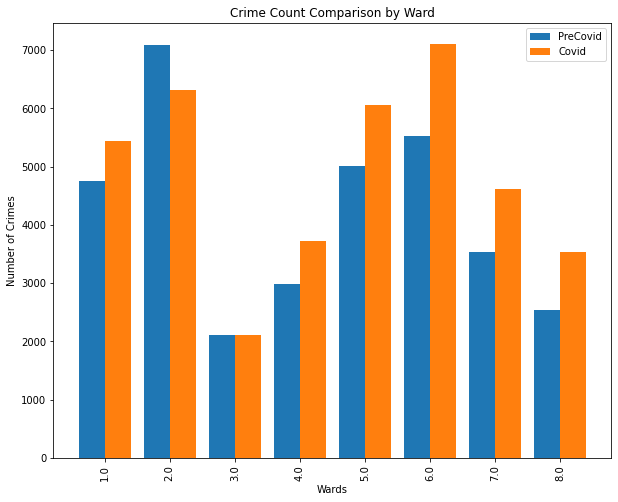

In [9]:
# view crime count by ward before and during covid
wards = crime["WARD"].dropna().unique()
x_w = wards.sort()
pc_w = preCovid['WARD'].value_counts().sort_index()
c_w = Covid['WARD'].value_counts().sort_index()
print("Crime count by ward before Covid-19",pc_w,"Crime count by ward during Covid-19",c_w,sep='\n')

plt.figure(figsize=(10, 8))

x=np.arange(len(wards))
plt.bar(x - 0.2, pc_w, 0.4, label = 'PreCovid')
plt.bar(x + 0.2, c_w, 0.4, label = 'Covid')

plt.xticks(x, wards, rotation = 90)
plt.xlabel("Wards")
plt.ylabel("Number of Crimes")
plt.title("Crime Count Comparison by Ward")
plt.legend()
plt.show()

Crime count by month before Covid-19
1     4679
2     4001
3     2645
4     2108
5     2226
6     2405
7     2537
8     2596
9     2605
10    2748
11    2492
12    2529
Name: REPORT_DAT, dtype: int64
Crime count by month during Covid-19
1     1794
2     1499
3     2914
4     3065
5     3810
6     4247
7     4183
8     4345
9     4929
10    4043
11    2082
12    2010
Name: REPORT_DAT, dtype: int64


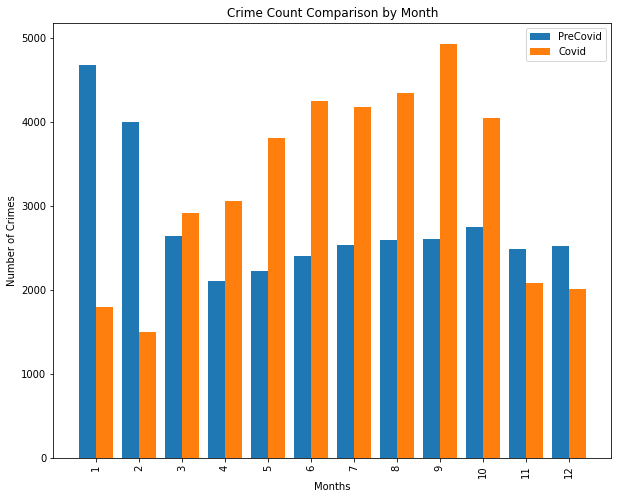

In [10]:
# view crime count by month before and during covid
months_p = preCovid["REPORT_DAT"].dt.month
months_c = Covid['REPORT_DAT'].dt.month
pc_m = months_p.value_counts().sort_index()
c_m = months_c.value_counts().sort_index()
print("Crime count by month before Covid-19",pc_m,"Crime count by month during Covid-19",c_m,sep='\n')

plt.figure(figsize=(10, 8))

x = np.arange(12)
plt.bar(x - 0.2, pc_m, 0.4, label = 'PreCovid')
plt.bar(x + 0.2, c_m, 0.4, label = 'Covid')

plt.xticks(x, pc_m.index, rotation = 90)
plt.xlabel("Months")
plt.ylabel("Number of Crimes")
plt.title("Crime Count Comparison by Month")
plt.legend()
plt.show()